# ODI Guinea Bissau Geoplot
---
Glenn Abastillas | April 5, 2020

<img src="data/pdf/G-B_Admin.pdf" />

Notebook to inspect and visualize geo data for Guinea Bissau.

  * [Load Data](#load_data)
      1. [SHP](#load_data_shp)
      2. [DBF](#load_data_dbf)
  * [Clean Data](#clean_data)
  * [Simple Maps](#simple_maps)

In [12]:
import altair as alt
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

from collections import namedtuple
import json
from pathlib import Path

maps = Path('data/maps')
aux  = Path('data/aux')
maps_ = {'regions' : maps / 'regioes/gnb_admbndp2_1m_salb.shp',
         'streets' : maps / 'estradas/gnb_roads_estradas_1m_INEC.shp',
         'healthcenters' : maps / 'centros da saude/centros da saúde.shp',
         'schools' : maps / 'schools/Schools_from_MOE.shp',
#          'sanitary_areas' : maps / 'sanitary areas/areas_sanitarias.shp',
         'sectors' : maps / 'setores/sectores.shp'}

data_ = {'healthcenters' : aux / 'healthcenters_forGIS.csv',
         'covid' : aux / 'HCF data for COVID - UNICEF GB.csv',
         'census' : aux / 'gpw-v4-admin-unit-center-points-population-estimates-rev11_gnb_csv/gpw_v4_admin_unit_center_points_population_estimates_rev11_gnb.csv'}

%matplotlib inline

<a id='load_data'></a>
### Load Data

<a id='load_data_shp'></a>
Load shapefiles

In [13]:
regions, streets, healthcenters, schools, sectors  = [gpd.read_file(file) for file in maps_.values()]


<a id='load_data_dbf'></a>
Load database files

In [14]:
read_data = lambda x : pd.read_csv(x) if 'csv' in x.suffix else pd.read_excel(x, skiprows=1)

healthcenters_, covid, census = [read_data(_) for _ in data_.values()]

<a id='clean_data'></a>
## Clean Data

Variables

In [16]:
DN = regioes.DN.unique()  # Unique region identifiers

In [49]:
rdbf = pd.read_csv(maps / 'regioes/GBregioes.dbf')

In [56]:
demographics = pd.read_csv('data/aux/GBDemographicSocioEconomic.csv')

In [72]:
healthsites = gpd.read_file('data/aux/GBHealthsites_big.txt')

Column names

In [13]:
regioes.columns

Index(['DN', 'geometry'], dtype='object')

In [14]:
estradas.columns

Index(['FNODE_', 'TNODE_', 'LPOLY_', 'RPOLY_', 'LENGTH', 'BIJGABROUT', 'TYPE',
       'geometry'],
      dtype='object')

Generate color mappings.

In [46]:
dn_count = regioes.DN.unique().size

In [47]:
factors, *_ = regioes.DN.factorize()

In [48]:
colors = np.random.rand(dn_count, 3)
colors[10:,:] = 0
colors[0, :] = 0

In [49]:
dn_count

40

## Merge data

Identify key columns

In [23]:
region_columns=['ADM1_NAME', 'ADM2_NAME', 'HRname']
covid_columns=['reg_san', 'area_san', 'hcf_name']
census_columns=['NAME1', 'NAME2']

Merge data

In [24]:
merge_1 = regions.merge(covid, how='left', left_on=region_columns, right_on=covid_columns)
merge_2 = merge_1.merge(census, how='left', left_on=region_columns[:-1], right_on=census_columns)

Save merged data

In [25]:
merge_2.to_csv(aux / "merged.csv", index=False)

In [33]:
g = json.loads(merge_2.to_json())

json.dump(g, open(aux / 'merged.json', 'w'))

---

In [296]:
regions_covid = regions.merge(covid, how='left', left_on=['ADM1_NAME', 'ADM2_NAME', 'HRname'], right_on=['reg_san', 'hcf_name', 'area_san'])

In [297]:
regions.shape, covid.shape

((39, 12), (145, 78))

In [298]:
regions_covid.shape

(39, 90)

In [300]:
regions_covid.head()

,CNTRY_NAME,CNTRY_CODE,ADM1_NAME,ADM1_CODE,ADM2_NAME,ADM2_CODE,RowcaCode1,RowcaCode2,HRname,HRpcode,...,energy_light_total,energy_light_func,solar - panel - installed,solar - panel - num,solar - panel - cap,solar - batt - installed,solar - batt - num,solar - batt - cap,rehab - elec - year.1,rehab - elec - org
0,Guinea Bissau,GNB,Bafata,GNB001,Bambadinca,GNB001002,GNB001,GNB001002,Bambadinca,GW001002,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Guinea Bissau,GNB,Tombali,GNB009,Bedanda,GNB009001,GNB009,GNB009001,Bedanda,GW009001,...,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Guinea Bissau,GNB,Cacheu,GNB004,Bigene,GNB004001,GNB004,GNB004001,Bigene,GW004001,...,10.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Guinea Bissau,GNB,Bissau,GNB008,Sector Autonomo de Bissau,GNB008000,GNB008,GNB008000,Sector Autonomo de Bissau,GW008000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Guinea Bissau,GNB,Oio,GNB006,Nhacra,GNB006005,GNB006,GNB006005,Nhacra,GW006005,...,22.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Save merged data

In [301]:
regions_covid.to_csv(aux / "GB_Regions_Covid.csv", index=False)

### Plot Map

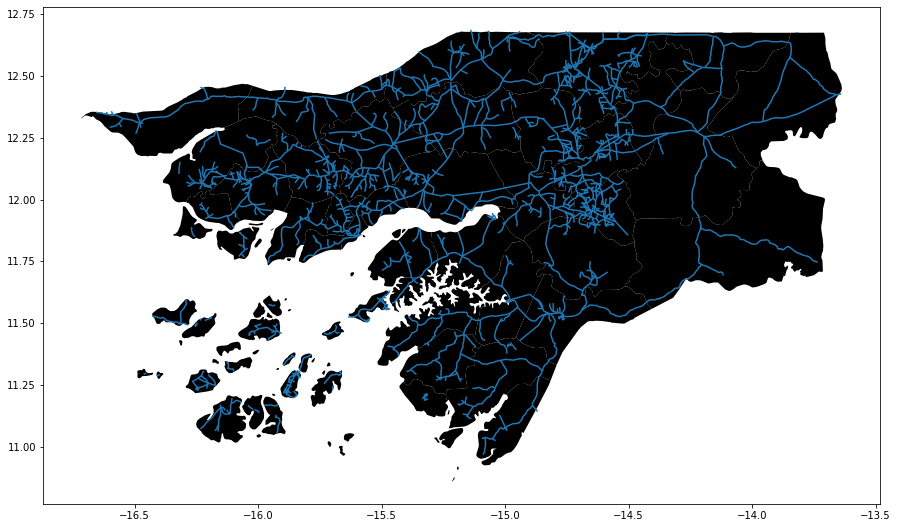

In [50]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 15))

colors = np.random.rand(dn_count, 3)
colors[25:,:] = 0
colors[:24, :] = 0

regions.plot(ax=ax1, color=colors[factors]); # estradas.plot(ax=ax2)
streets.plot(ax=ax1)
ax1

### Altair

Data transformations

Convert dataframes to JSON.

In [131]:
alt_regions = json.loads(regions.to_json())
alt_streets = json.loads(streets.to_json())
alt_schools = json.loads(schools.to_json())

Wrap JSON data as Altair Data objects

In [132]:
alt_regions = alt.Data(values=alt_regions['features'])
alt_streets = alt.Data(values=alt_streets['features'])
alt_schools = alt.Data(values=alt_schools['features'])

In [266]:
regions_chart = alt.Chart(alt_regions, width=1100, height=1200).mark_geoshape()
streets_chart = alt.Chart(alt_streets, width=1100, height=1200).mark_geoshape(fill=None, stroke='black', strokeWidth=2)
schools_chart = alt.Chart(alt_schools, width=1100, height=1200).mark_geoshape()

Available variables in data

In [271]:
mouseover = alt.selection_single(on='mouseover', nearest=False)
regions_dict = {
#                 'tooltip' : alt.Tooltip('properties.ADM2_NAME:N'),
                'color' : alt.Color('properties.ADM1_NAME:N', legend=alt.Legend(title='Region')),
                'stroke' : alt.Color('properties.ADM1_NAME:N', legend=alt.Legend(title='Region'), sort='ascending'),
                'opacity' : alt.condition(mouseover, alt.value(.5), alt.value(0.35))}

streets_dict = {'opacity' : alt.Opacity('properties.TYPE:O', legend=None, sort='ascending'),
                'tooltip' : alt.Tooltip('properties.LENGTH:Q'),
                'strokeWidth' : alt.StrokeWidth('properties.TYPE:Q', legend=alt.Legend(title='Road Type'), sort='ascending')}

In [272]:
regions_chart_ = regions_chart.encode(**regions_dict).add_selection(mouseover)
streets_chart_ = streets_chart.encode(**streets_dict)

In [276]:
(regions_chart_ + streets_chart_)

alt.LayerChart(...)

In [258]:
streets.TYPE.unique()

array([3, 5, 1, 0, 6, 2, 4, 7])